In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# The Dataset

This dataset contains grocery pricing data collected over two years in Switzerland, covering 35 different product categories. The dataset provides valuable insights into price trends and fluctuations for various grocery items in the Swiss market. This information can be crucial for understanding consumer behavior, market dynamics, and the impact of economic factors on grocery prices.

In [2]:
data = pd.read_csv('data/SwissBills.csv')

We check for null values or NaN values, since they can cause errors in the future calculations.

In [3]:
data.isnull().any() # Check if threre are any Null/NaN values in the datset

Description    False
Price          False
Date           False
dtype: bool

In [4]:
data['Description'].value_counts() # Check the number of unique values in the Description column

Description
Bread               176
Cherry Tomatoes     132
Mozzarella          127
Bananas             114
Bun                 109
Cucumber            105
Cream                99
Pesto                94
Water                93
Carbonated Water     86
Sausages             77
Yogurt               74
Salami               70
Beef                 65
Orange Juice         59
Philadelphia         57
Olives               56
Avocados             54
Eggs                 53
Cheese               52
Apples               47
Peppers              47
Butter               45
Grapes               44
Cherry               43
Berries Yogurt       41
Potatoes             39
Clementines          38
Boiled Eggs          37
Meat                 36
Ham                  35
Pikelet              35
Strawberries         34
Croissant            34
Name: count, dtype: int64

Lets plot our data to get an overview

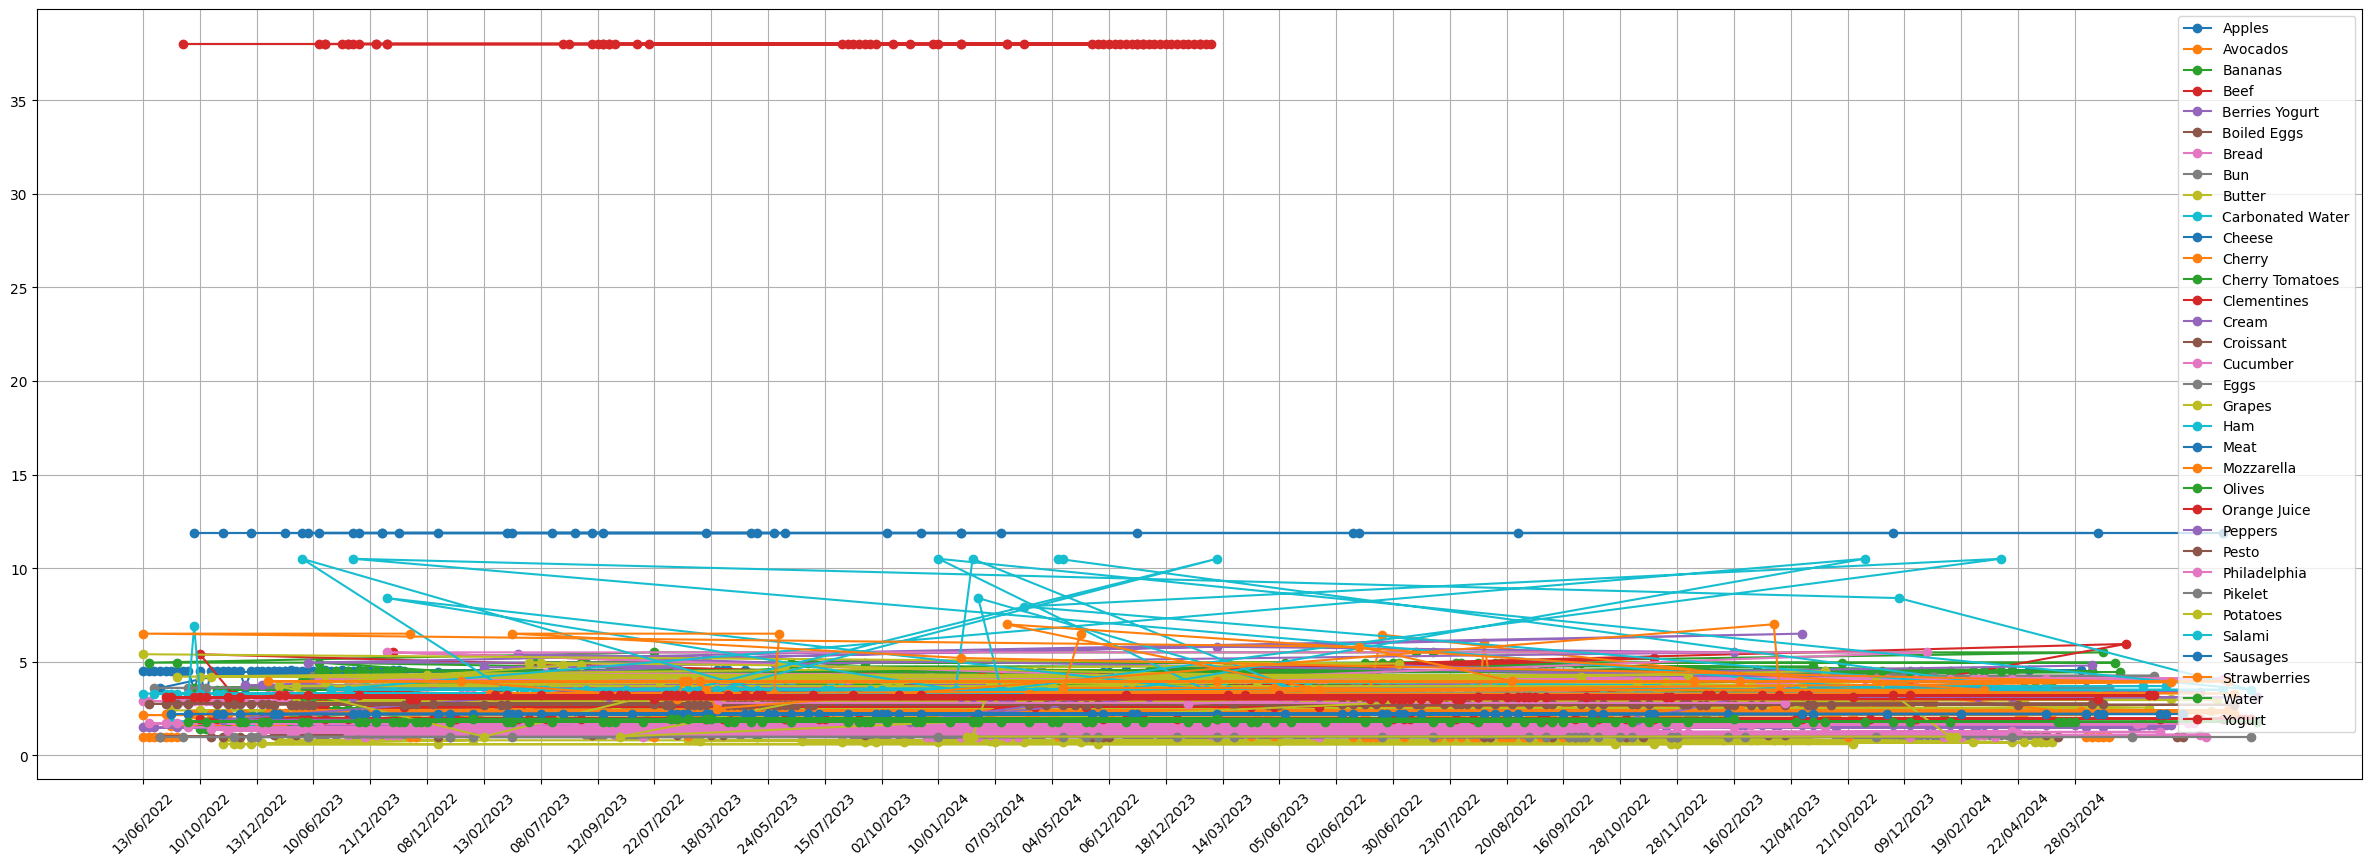

In [5]:
grouped = data.groupby('Description')

plt.figure(figsize=(30, 10))

for name, group in grouped:
    plt.plot(group['Date'], group['Price'], label=name, marker='o')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 350, 10), rotation=45)
plt.show()

If we want, we can also look at the data using plotly, which is a more interactive way to look at the data as compared to matplotlib/seaborn.

In [6]:
px.line(data, x='Date', y='Price', color='Description', title='Swiss Bills Prices Over Time')

We will choose the products with the highest occurence of samples, those being bread, cherry tomatoes and mozzarella.

In [7]:
bread = data[data['Description'] == 'Bread']
cherry_tomatoes = data[data['Description'] == 'Cherry Tomatoes']
mozzarella = data[data['Description'] == 'Mozzarella']

In [8]:
bread['Price'].describe(), cherry_tomatoes['Price'].describe(), mozzarella['Price'].describe()

(count    176.000000
 mean       2.950284
 std        0.104676
 min        2.800000
 25%        2.900000
 50%        2.900000
 75%        2.950000
 max        3.200000
 Name: Price, dtype: float64,
 count    132.000000
 mean       3.592803
 std        1.105057
 min        1.700000
 25%        2.500000
 50%        3.600000
 75%        4.950000
 max        5.500000
 Name: Price, dtype: float64,
 count    127.000000
 mean       2.329134
 std        0.504600
 min        2.150000
 25%        2.200000
 50%        2.250000
 75%        2.400000
 max        6.450000
 Name: Price, dtype: float64)

In the following boxplots, two outliers are to be seen in the bread prices and in the mozzarella prices and while bread, being a staple food, has got a small price range,t outliers from the mozarella prices, which are not a staple food, are much higher, while for cherry tomatoes the entire price range is very broad, which indicates that the price of cherry tomatoes can vary a lot. This might be due to the fact that cherry tomatoes are a seasonal product and that the price is influenced by the season.


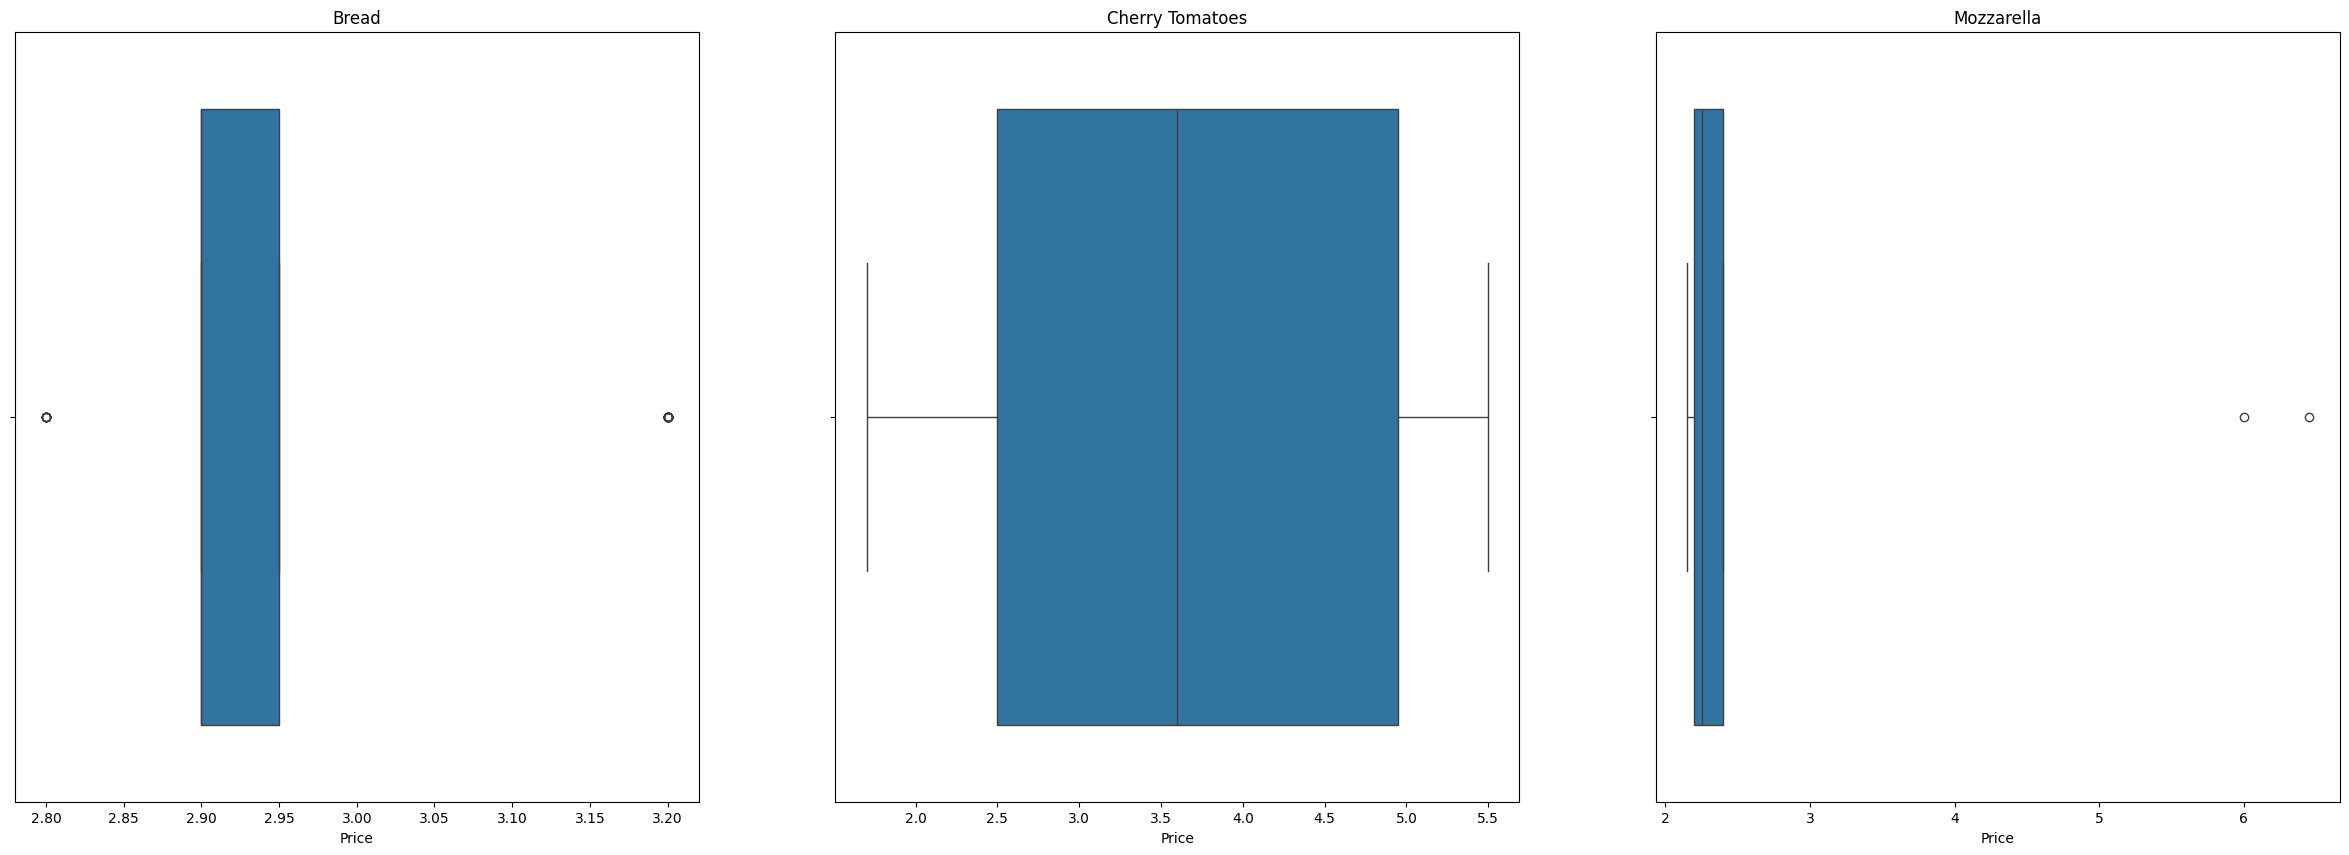

In [9]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x = bread['Price'])
plt.title('Bread')

plt.subplot(1, 3, 2)
sns.boxplot(x = cherry_tomatoes['Price'])
plt.title('Cherry Tomatoes')

plt.subplot(1, 3, 3)
sns.boxplot(x = mozzarella['Price'])
plt.title('Mozzarella')

plt.show()


We would like to create a function, that removes extreme outliers from the data, so that we can have a better understanding of the data. We will be using the IQR methods to remove the outliers, which is a common method to remove outliers.

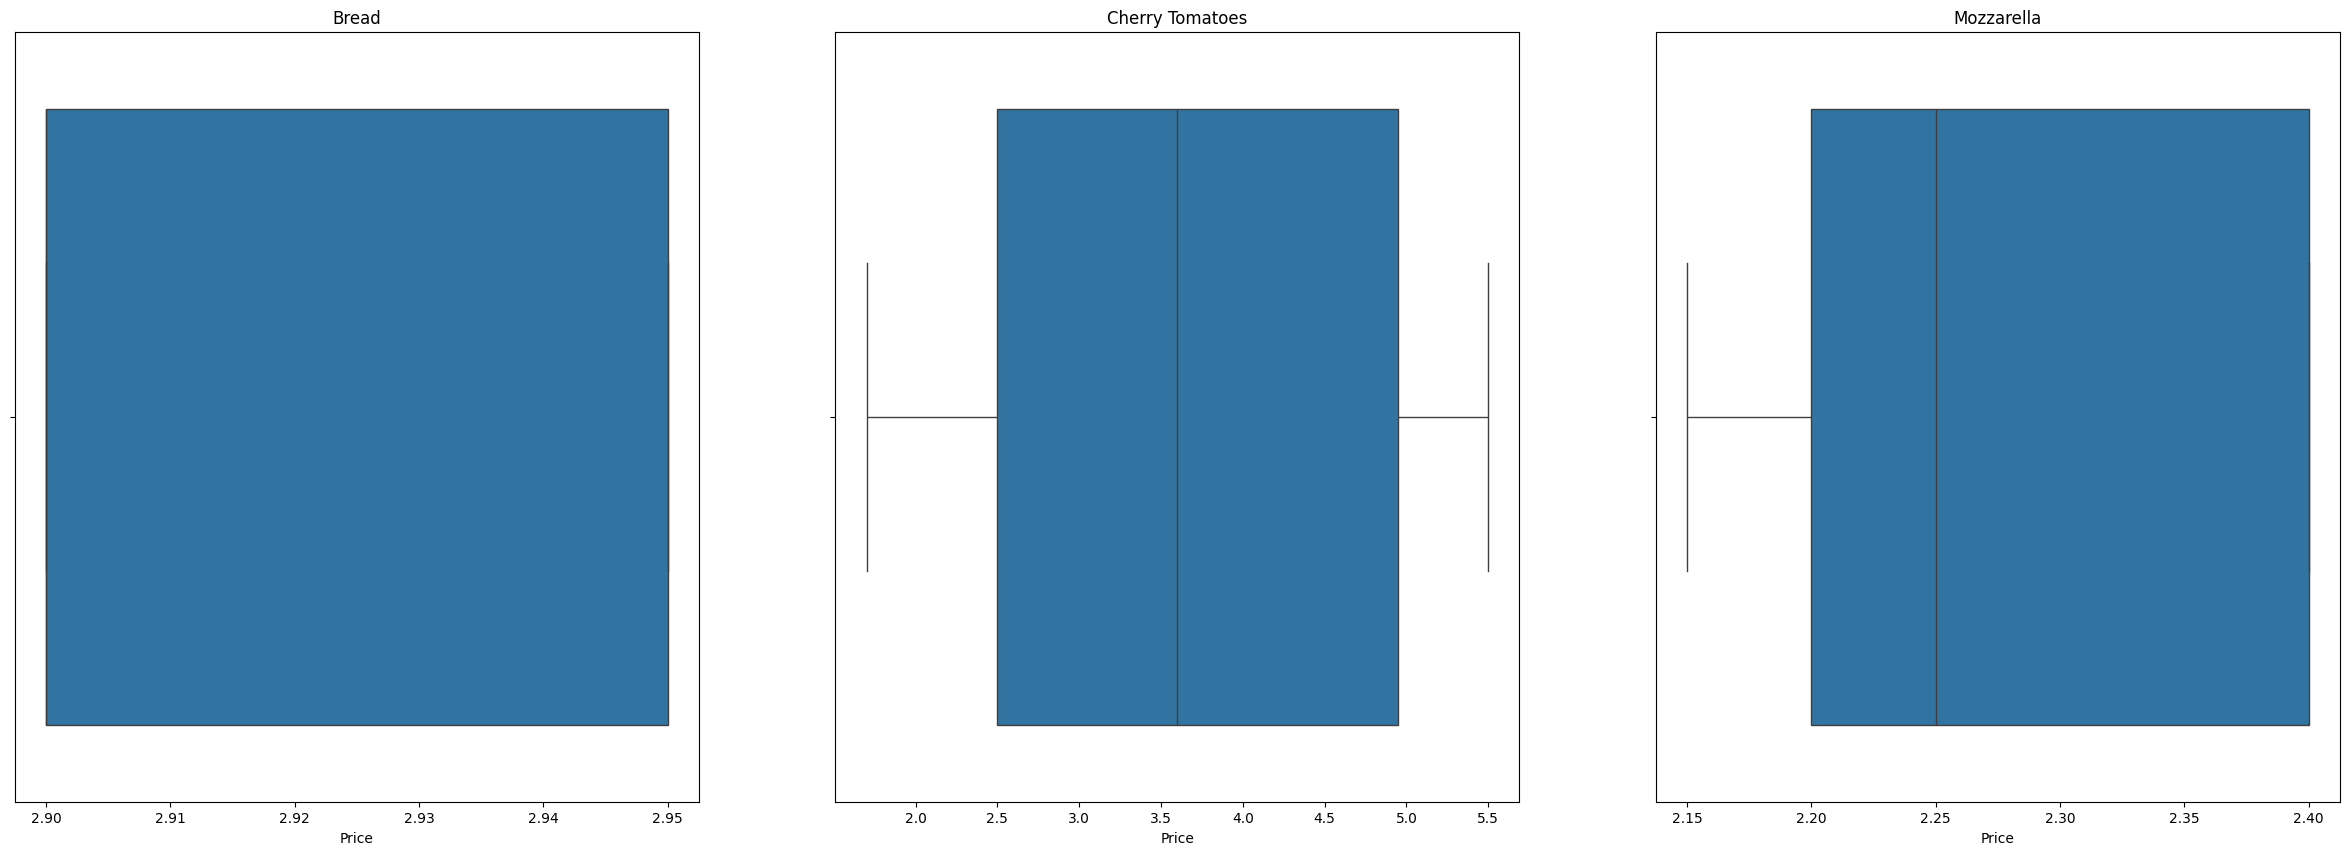

In [10]:
def outlier_removal(data):
    Q1 = data['Price'].quantile(0.25)
    Q3 = data['Price'].quantile(0.75)

    IQR = Q3 - Q1

    data = data[(data['Price'] >= (Q1 - 1.5 * IQR)) & (data['Price'] <= (Q3 + 1.5 * IQR))]

    return data

bread = outlier_removal(bread)
cherry_tomatoes = outlier_removal(cherry_tomatoes)
mozzarella = outlier_removal(mozzarella)

plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x = bread['Price'])
plt.title('Bread')

plt.subplot(1, 3, 2)
sns.boxplot(x = cherry_tomatoes['Price'])
plt.title('Cherry Tomatoes')

plt.subplot(1, 3, 3)
sns.boxplot(x = mozzarella['Price'])
plt.title('Mozzarella')

plt.show()





Next we will be plotting the prices with the dates to see the trend of the prices over time. The difference here is only 5 rappen for bread.

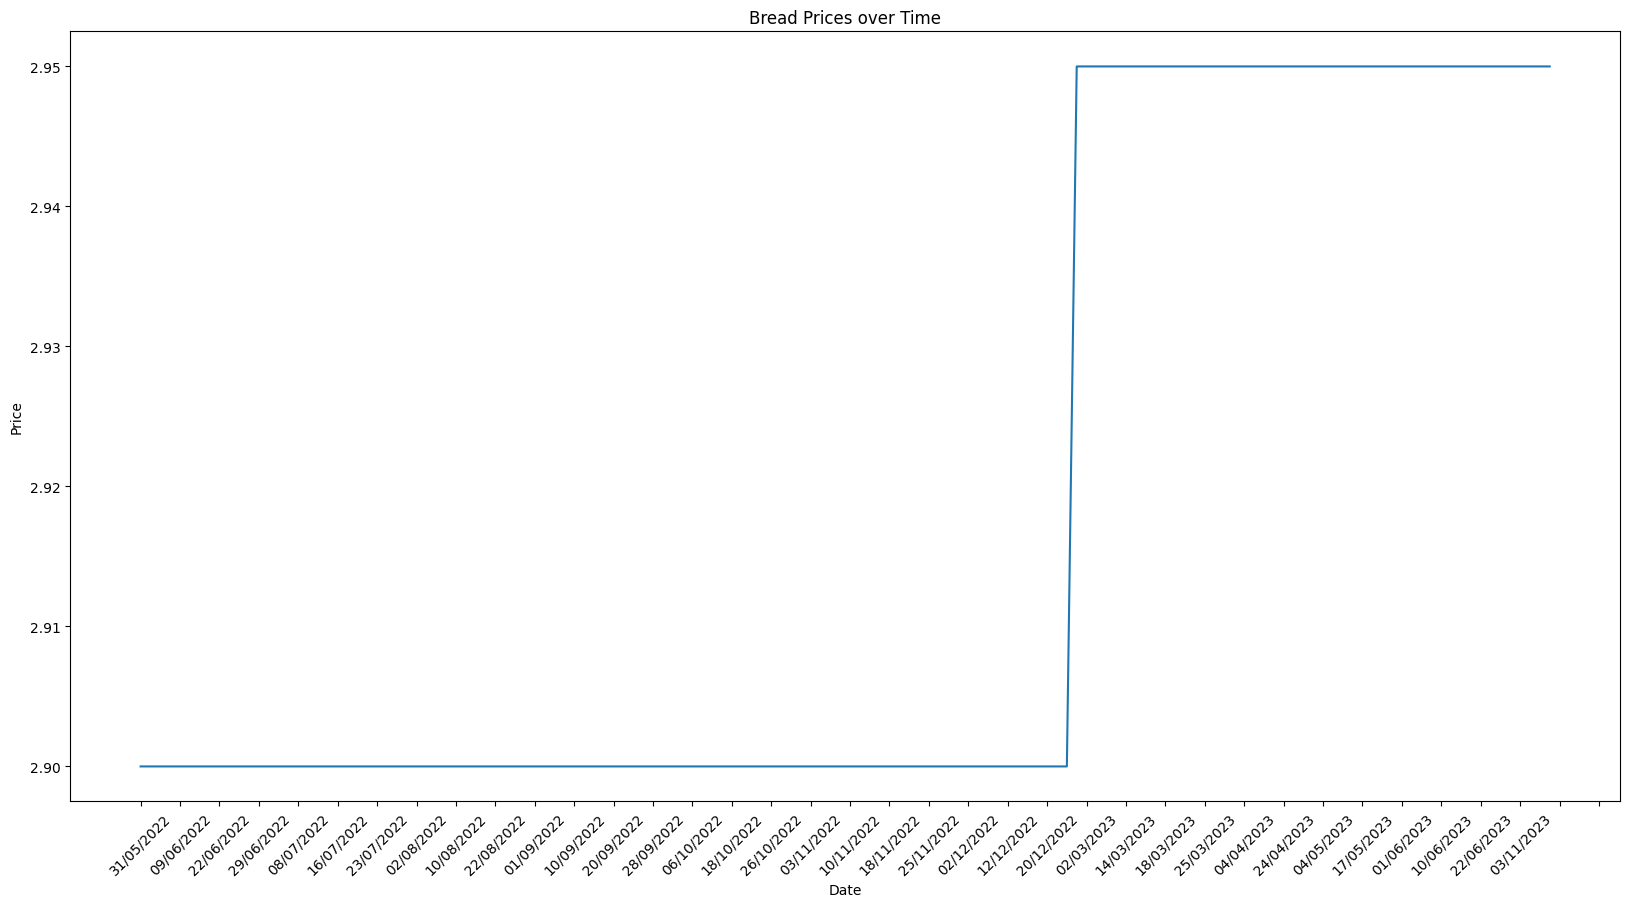

In [11]:
plt.figure(figsize=(20, 10))

sns.lineplot(x = 'Date', y = 'Price', data = bread)

plt.title('Bread Prices over Time')
plt.xticks(np.arange(0, 150, step=4),  rotation = 45, )

plt.show()

Well, thats not interesting, is it? How about we plot the prices of cherry tomatoes to see the trend of prices over time? Here we can see drastic price changes depending on the time of the year. The prices are highest in the summer months and lowest in the winter months. This is due to the fact that cherry tomatoes are a seasonal product and the price is influenced by the season.

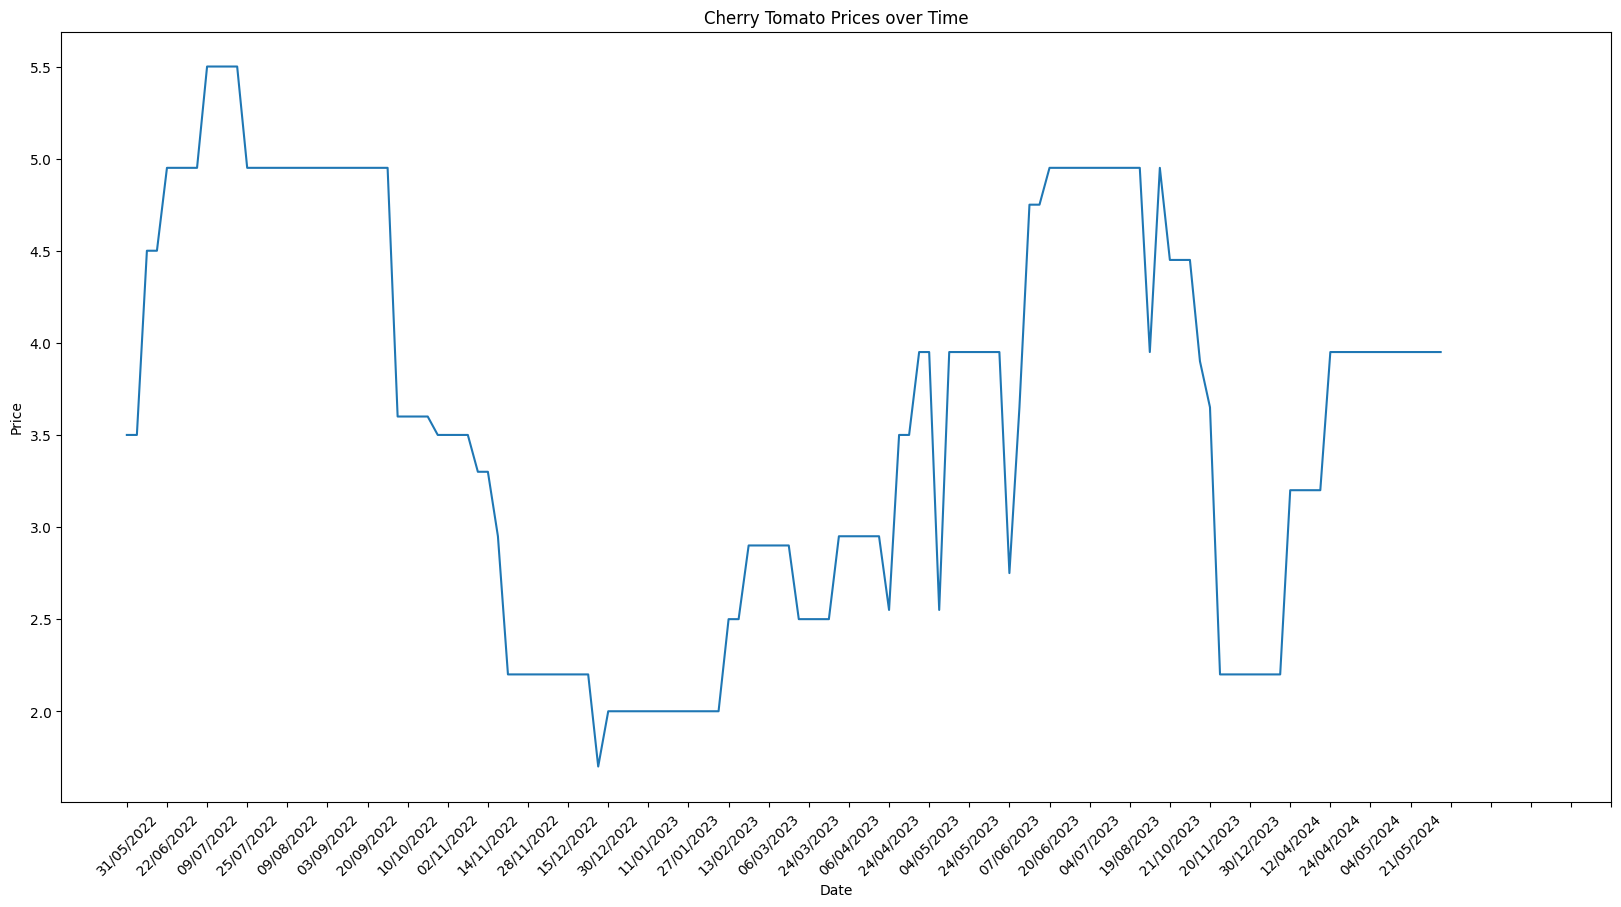

In [12]:
plt.figure(figsize=(20, 10))

sns.lineplot(x = 'Date', y = 'Price', data = cherry_tomatoes)

plt.title('Cherry Tomato Prices over Time')
plt.xticks(np.arange(0, 150, step=4),  rotation = 45, )

plt.show()